# **Estimator?**
- Estimator không chỉ là một thuật ngữ để chỉ các mô hình học máy, mà còn là một API chính được thực hiện bởi scikit-learn. API này cung cấp một giao diện nhất quán cho một loạt các ứng dụng học máy, và do đó tất cả các thuật toán học máy trong scikit-learn đều được triển khai thông qua Estimator API.

# **Chức năng của estimator**
1. **`Ước lượng và giải mã mô hình: Được đặc trưng bởi các yếu tố:`**
- Các tham số được cung cấp trong quá trình xây dựng đối tượng Estimator.
- Trạng thái ngẫu nhiên toàn cục (numpy.random) nếu tham số random_state của Estimator được đặt là none.
- Bất kỳ dữ liệu nào được truyền vào cuộc gọi gần đây nhất cho phương thức fit, fit_transform hoặc fit_predict.
- Bất kỳ dữ liệu nào được truyền vào một chuỗi các cuộc gọi cho phương thức partial_fit.

2. **`Ánh xạ từ biểu diễn dữ liệu không chữ nhật thành dữ liệu chữ nhật`**:
- Estimator có thể được sử dụng để dự đoán các giá trị còn thiếu trong dữ liệu mới dựa trên các thông tin đã có.


3. **`Phân biệt giữa các giá trị nội vi và ngoại vi`**:
Estimator mô hình phân biệt giữa các mẫu trung tâm và mẫu ngoại vi bằng cách sử dụng các phương pháp sau:
    - fit
    - fit_predict nếu là transductive
    - predict nếu là inductive

# **Nguyên tắc thiết kế**
1. **`Tính nhất quán (Consistency)`**: Nguyên tắc này đề cập đến việc tất cả các đối tượng nên chia sẻ một giao diện chung được rút ra từ một tập hợp hạn chế các phương thức. Tài liệu cũng nên được thiết kế một cách nhất quán.
2. **`Sơ đồ đối tượng giới hạn (Limited object hierarchy)`**: Nguyên tắc này nói về cách biểu diễn các thuật toán và tập dữ liệu trong Scikit-Learn.
3. **`Sự kết hợp (Composition)`**: Nguyên tắc này cho biết các thuật toán học máy có thể được biểu diễn dưới dạng các chuỗi của nhiều thuật toán cơ bản.
4. **`Các giá trị mặc định hợp lý (Sensible defaults)`**: Theo nguyên tắc này, thư viện Scikit-Learn định nghĩa một giá trị mặc định phù hợp khi các mô hình học máy yêu cầu các tham số được chỉ định bởi người dùng.
5. **`Kiểm tra (Inspection)`**: Theo nguyên tắc này, mọi giá trị tham số được chỉ định được tiết lộ như các thuộc tính công cộng.


# **Quy trình**
1. `Bước 1: Chọn lớp mô hình (Choose a class of model)`
- Mô tả: Cần chọn loại mô hình phù hợp với bài toán
- Thực hiện: Nhập lớp Estimator phù hợp (VD: Hồi quy tuyến tính, cây quyết định, k-means)

2. `Bước 2: Chọn các siêu tham số của mô hình (Choose model hyperparameters)`
- Mô tả: Chọn các siêu tham số - các tham số quyết định cách mô hình học từ dữ liệu. (số lượng cụm trong KMeans, độ sâu tối đa của cây quyết định)
- Thực hiện: Khởi tạo đối tượng lớp mô hình với các giá trị siêu tham số mong muốn.

3. `Sắp xếp dữ liệu (Arranging the data)`
- Mô tả: Chuẩn bị dữ liệu đầu vào và đầu ra.
  - Dữ liệu đầu vào (features matrix) được biểu diễn dưới dạng ma trận 
  - Đ đầu ra (target vector) được biểu diễn dưới dạng vectoy.
- Thực hiện: Đảm bảo dữ liệu được sắp xếp đúng định dạng

4. `Huấn luyện mô hình (Model Fitting)`
- Mô tả: Huấn luyện mô hình với dữ liệu đã chuẩn bị.
- Thực hiện: Gọi phương thức `fit()` trên đối tượng mô hình với dữ liệu X và y

5. `Áp dụng mô hình (Applying the model)`
- Mô tả: Sau khi mô hình đã được huấn luyện, bạn có thể áp dụng nó cho dữ liệu mới để đưa ra dự đoán hoặc khám phá các đặc tính dữ liệu.
- Thực hiện:
  - Với học có giám sát, sử dụng phương thức predict() để dự đoán nhãn cho dữ liệu mới
  - Với học không giám sát, sử dụng predict() hoặc transform() để suy luận các đặc tính của dữ liệu.
y.

In [4]:
# Ví dụ minh họa
# Bước 1: Chọn lớp mô hình
from sklearn.linear_model import LinearRegression

# Bước 2: Chọn các siêu tham số của mô hình
model = LinearRegression()

# Bước 3: Sắp xếp dữ liệu
X = [[1, 2], [2, 3], [3, 4]]
y = [3, 4, 5]

# Bước 4: Huấn luyện mô hình
model.fit(X, y)

# Bước 5: Áp dụng mô hình
y_pred = model.predict([[4, 5]])
print(y_pred)  # Dự đoán đầu ra cho dữ liệu mới


[6.]


### Giải thích kết quả:

- Mô hình tìm được phương trình tuyến tính dưới dạng y = w1x1 + w2x2 + b (mô hình hồi quy đa tuyến)
- Hệ phương trình có dạng:
  ```
  1w1 + 2w2 = 3
  2w1 + 3w2 = 4
  3w1 + 4w2 = 5
  ```
- Phương pháp giải: Bình phương cực tiểu (Least Squares):
  - Chuẩn bị dữ liệu:
    - X được dựng bằng với cột đầu là 1, các cột sau tương ứng với hệ số
    - y là vector mục tiêu
  - Nếu det(X.T * X) != 0:
    - Tính toán ma trận pseudo-inverse: `X+ = (X.T*X)^(-1) * X.T`
    - Tính các giá trị hệ số w = X+ * y
  - Nếu không: Sử dụng phương pháp Regularization:
    - Chọn một giá trị a nhỏ
    - Tìm `w = (X.T * X + a*I) ^ (-1) * X.T * y`

In [54]:
import numpy as np
import functools
from sklearn.linear_model import LinearRegression

# Xây dựng mô hình
model = LinearRegression()

# Huấn luyện mô hình
model.fit(X, y)

# Chuyển dữ liệu sang numpy arrays
X = np.array([[1, 2], [2, 3], [3, 4]])
y = np.array([3, 4, 5])

# Tính trọng số và bias
w = model.coef_ # Tính các trọng số
b = model.intercept_ # Tính hệ số chặn

print(f"w1: {w[0]}, w2: {w[1]}, b: {b}")

text = np.array([4, 5])
ans = sum(w * text) + b
print(ans)

w1: 0.5, w2: 0.4999999999999999, b: 1.5000000000000004
6.0


Cho một danh sách gồm n sinh viên, mỗi sinh viên có 2 thông tin là điểm thi lý thuyết và điểm thi thực hành, nhưng đây chỉ là thi thử. Với một học sinh có điểm thi lý thuyết là 5 và điểm thi thực hành là 6, hỏi xem bạn ấy có thể thi thật với điểm số bao nhiêu?

In [70]:
import pandas as pd
import numpy as np
import functools
from sklearn.linear_model import LinearRegression


# Dữ liệu đầu vào
df = pd.DataFrame(
    data = np.array([
        [4, 1],
        [6, 2],
        [7, 5],
        [3, 4],
        [2, 9],
        [5, 7],
        [4, 1],
        [2, 6],
        [10, 10],
        [0, 9],
        [4, 5],
        [2, 7],
        [9, 3],
        [2, 6],
        [3, 8],
        [1, 3],
        [5, 6],
        [9, 2],
        [2, 9],
        [3, 6],
        [4, 2], 
        [9, 5],
        [8, 9],
        [0, 8],
        [8, 1]
    ])
    , columns = ['lt', 'th']
)

df['total'] = df['lt'] * 0.3 + df['th'] * 0.7

for i in range(df.shape[0]):
    k = 0
    if 9 <= df.iloc[i, 2] <= 10:
        k = df.iloc[i, 2] * np.round(np.random.uniform(-0.01, 0), 3)
    elif 0 <= df.iloc[i, 2] <= 1:
        k = 0
    else:
        k = df.iloc[i, 2] * np.round(np.random.uniform(-0.01, 0.01), 3)
    df.iloc[i, 2] += k * df.iloc[i, 2]



# Xây dựng mô hình hồi quy
model = LinearRegression()
model.fit(df[['lt', 'th']], df['total'])

# In ra hệ số của mô hình
print(f"Coefficients: {model.coef_}")

# In ra hệ số chặn của mô hình
print(f"Intercept: {model.intercept_}")



# Thử mẫu:
sample = pd.DataFrame([[5, 6]], columns=['lt', 'th'])
predicted_total = model.predict(sample)
print(f"Giá trị dự đoán cho 'total': {predicted_total[0]}")

Coefficients: [0.3021004  0.71516545]
Intercept: -0.032037384629495236
Giá trị dự đoán cho 'total': 5.769457293697901


# Học máy có giám sát (Supervised learning)
- Là một phương pháp học máy mà chúng ta cung cấp cho mô hình cả dữ liệu đầu vào và đầu ra tương ứng. Mục tiêu của phương pháp này là học cách dự đoán nhãn dữ liệu từ dữ liệu đầu vào.
- Các thuật toán được sử dụng:
  - Phân loại (Classification): Dự đoán nhãn của dữ liệu, nhãn ở đây là các giá trị rời rạc. VD: Logistic Regression, Support Vector Machines, Decision Trees
  - Hồi quy (Regression): Dự đoán giá trị liên tục của dữ liệu. VD:
    - Simple Linear Regression: y = ax + b
    - Multiple Linear Regression: y = a1x1 + a2x2 + b
    - Polynomial Regression: y = a1x^2 + a2x + b

Hệ số góc:  [1.99839352]
Hệ số chăn:  -0.989545945777504


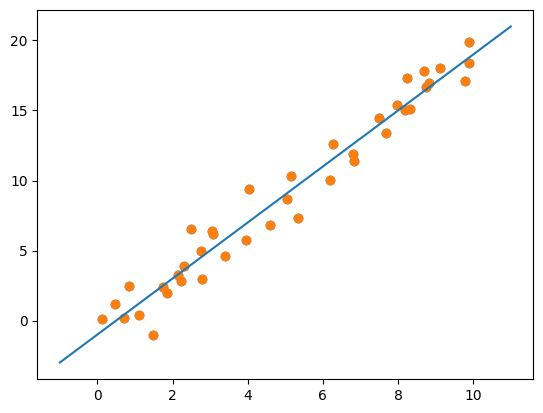

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Tạo mô hình
rng = np.random.RandomState(35) # Khởi tạo một đối tượng RandomState từ np.
x = 10*rng.rand(40) 
# Tạo ra mảng x gồm 40 số ngẫu nhiên 
# (rng.rand() chỉ tạo ra các số ngẫu nhiên từ 0 đến 1)
y = 2*x-1+rng.randn(40) # Sử dụng mảng x.
plt.scatter(x,y);


# Chọn mô hình
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
X = x[:, np.newaxis]
model.fit(X, y)
print("Hệ số góc: ", model.coef_ )
print("Hệ số chăn: ", model.intercept_)


# Dự đoán đối tượng
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
plt.scatter(x, y)
plt.plot(xfit, yfit);

# Unsuperised Learning
- Là phương pháp học máy mà chúng ta chỉ cung cấp cho mô hình dữ liệu đầu vào (input data).
- Mục tiêu là tìm ra các mô hình ẩn, cấu trúc hoặc mối quan hệ trong dữ liệu.
- Các thuật toán được sử dụng:
  - Phân cụm (Clustering): Nhóm các điểm dữ liệu thành các cụm dựa trên độ tương tự giữa chúng. VD: K-means, Hierachical clustering
  - Giảm chiều dữ liệu (Dimensionality Reduction): Tìm ra các đặc trưng mới, ít chiều hơn nhưng vẫn giữ được thông tin quan trọng của dữ liệu gốc. VD: Principal Component Analysis (PCA), t-SNE.
  - Học biểu diễn: Học các biểu diễn dữ liệu ở dạng mới, giúp cho việc hiểu và xử lý dữ liệu dễ hơn VD: Autoencoders.

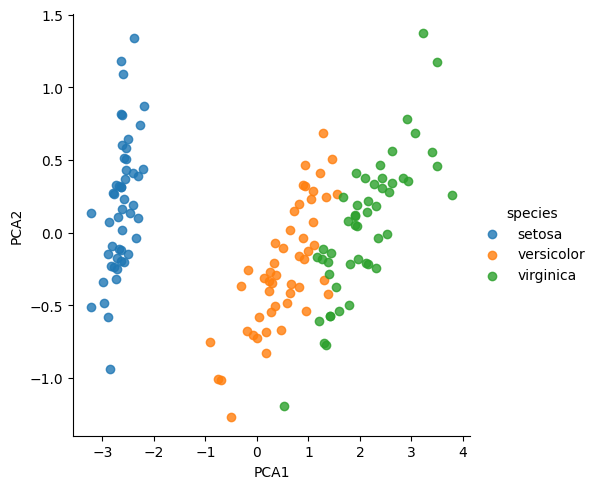

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


iris = sns.load_dataset('iris')
X_iris = iris.drop('species', axis = 1)
X_iris.shape
y_iris = iris['species']
y_iris.shape


# Chọn mô hình
from sklearn.decomposition import PCA

# Chọn các tham số cho mô hình
model = PCA(n_components=2)

# Huấn luyện mô hình dữ liệu
model.fit(X_iris)

# Chuyển dữ liệu thành 2 chiều
X_2D = model.transform(X_iris)

# Vẽ đồ thị để xem kết quả
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x = "PCA1", y = "PCA2", hue='species', data=iris, fit_reg=False);